### task 1

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ssl
import urllib.request

# Create an unverified SSL context
ssl._create_default_https_context = ssl._create_unverified_context

# Now, any urllib request will not perform SSL certificate verification
response = urllib.request.urlopen('https://example.com')
data = response.read()

In [3]:
from ucimlrepo import fetch_ucirepo 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### task 2

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
X.shape

(48842, 14)

### task 2.1

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

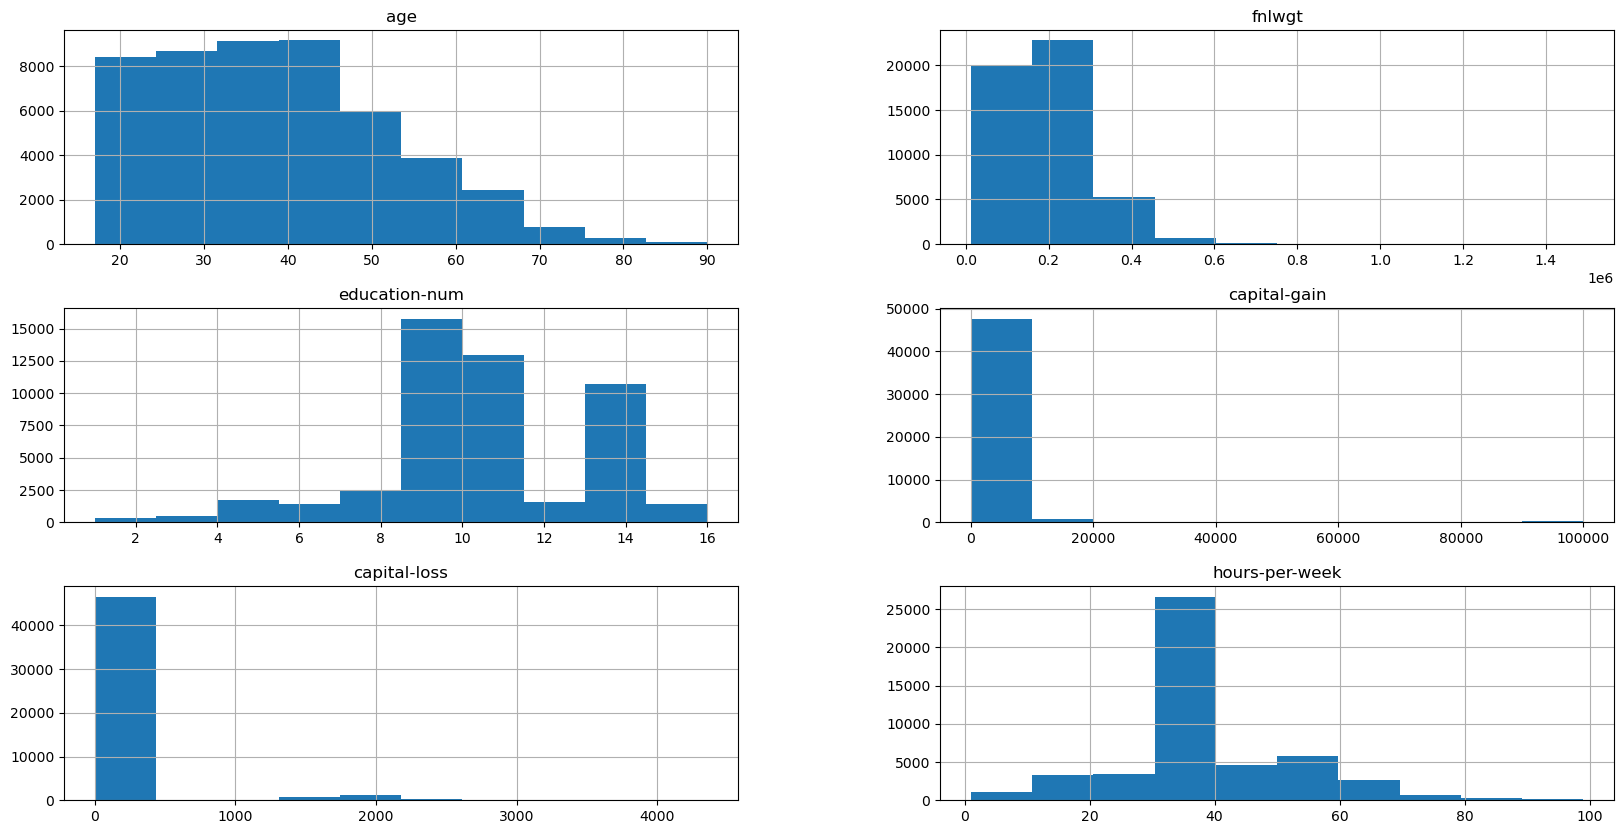

In [8]:
X.hist(figsize=(20, 10))

### task 3

In [9]:
X.replace(np.nan, ' ').replace('?', np.nan).isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

### task 4

In [10]:
# replacing the ? with not a number

(X.values == '?').sum()

X = X.replace('?', np.nan)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


### task 5

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Creating pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Using ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [13]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [14]:
# Applying the preprocessing pipeline on the dataset

X_prepared = preprocessing.fit_transform(X)

# adding back coloumn headers
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared.shape

(48842, 105)

### task 6

In [15]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### task 7

In [16]:
# replace the . in the <=50K
y = y.replace('<=50K.', '<=50K')
y = y.replace('>50K.', '>50K')

In [17]:
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

### task 8

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training set and 20% testing set

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


### task 9

In [19]:
from sklearn.svm import SVC

# Training a svm model (svc) to predict if the income of the adult exceeds 50K on the training set

model_svm = SVC(C=0.1, kernel='poly', gamma=1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel()) 

SVC(C=0.1, gamma=1, kernel='poly')

### task 9.1

In [20]:
from sklearn.metrics import classification_report

# testing model on the X_test and report the classifaction report

y_predict = model_svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



### task 9.2

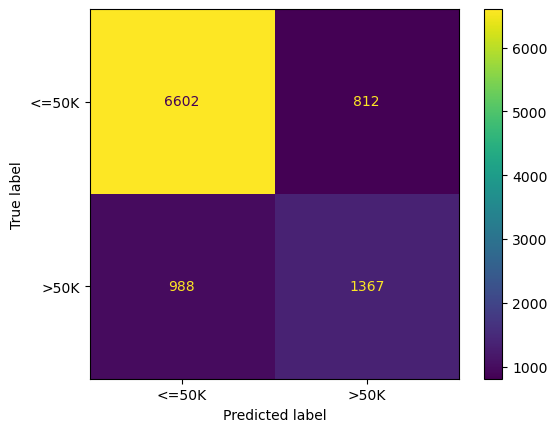

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# displaying the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### task 10

### task 10.1

In [22]:
# Splitting the dataset into 60% training, 20% validation, and 20% testing.

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


### task 10.2

In [23]:
from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'], 
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 1, 10]
                 }

svm = SVC()

svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)

svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
                        
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8472563472563472

In [24]:
print(svm_winner)

SVC(C=10, gamma=0.01)
